 ## **Load Dataset**

Dataset link: [Kaggle](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)

In [1]:
import kagglehub
import zipfile
import shutil
import os

# Download latest version
dataset_path = kagglehub.dataset_download("hernan4444/anime-recommendation-database-2020")

# Tentukan lokasi penyimpanan di Google Drive
drive_path = "/content/drive/MyDrive/MLT/anime_recommendation"

# Buat folder jika belum ada
os.makedirs(drive_path, exist_ok=True)

# Pindahkan file dataset yang diunduh ke Google Drive
shutil.move(dataset_path, drive_path)

# Ekstrak file jika dataset berbentuk zip
zip_file = os.path.join(drive_path, os.path.basename(dataset_path))
if zipfile.is_zipfile(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(drive_path)
    print("Dataset berhasil diekstrak di:", drive_path)
else:
    print("Dataset bukan dalam format ZIP, tidak perlu diekstrak.")

print("Path to dataset files:", drive_path)

100%|██████████| 661M/661M [00:30<00:00, 22.9MB/s]

Extracting files...


Dataset bukan dalam format ZIP, tidak perlu diekstrak.
Path to dataset files: /content/drive/MyDrive/MLT/anime_recommendation


 ## **Data Understanding**

List file dari dataset yang digunakan

In [2]:
DIR = '/content/drive/MyDrive/MLT/anime_recommendation/7/'
!ls {DIR}

 anime.csv	 anime_with_synopsis.csv   rating_complete.csv
 animelist.csv	'html folder'		   watching_status.csv


 Dari anime recommendation dataset yang digunakan, file yang dipilih hanya pada seputar `anime.csv` (informasi anime) dan `animelist.csv` (sebagai rating data)

Cek jumlah data yang ada di dataset

In [16]:
import pandas as pd

anime = pd.read_csv(DIR+'anime.csv')
rating = pd.read_csv(DIR + '/animelist.csv',
                        low_memory=False,
                        usecols=["user_id", "anime_id", "rating"]
                        , nrows=5000000
                        ) #Limit data yang dibaca agar tidak terjadi memory crash

print('Length of anime dataset: ', len(anime))
print('Length of rating: ', len(rating))

Length of anime dataset:  17562
Length of rating:  5000000


## **Univariate Exploratory Data Analysis**

### Anime (anime.csv)

 Informasi dari data anime berupa




In [17]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


 Mengetahui informasi terkait tipe data dan non-null data pada dataset `anime`

In [18]:
# Variable accepts
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [19]:
anime.isna().sum()

,0
MAL_ID,0
Name,0
Score,0
Genres,0
English name,0
Japanese name,0
Type,0
Episodes,0
Aired,0
Premiered,0


In [20]:
anime.shape

(17562, 35)

### Rating (rating.csv)

In [21]:
rating.head()

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0
4,0,21,10


 Mengetahui informasi terkait tipe data dan non-null data pada dataset `rating`

In [22]:
# Variable accepts
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 114.4 MB


 Mengecek missing value pada dataset `rating`

In [23]:
rating.isna().sum()

,0
user_id,0
anime_id,0
rating,0


In [24]:
rating.describe()

,user_id,anime_id,rating
count,5.000000e+06,5.000000e+06,5.000000e+06
mean,8.339305e+03,1.657369e+04,4.306854e+00
std,4.742759e+03,1.379504e+04,3.906990e+00
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.291000e+03,3.297000e+03,0.000000e+00
50%,8.378000e+03,1.254900e+04,6.000000e+00
75%,1.242100e+04,3.091100e+04,8.000000e+00
max,1.650800e+04,4.849100e+04,1.000000e+01


In [25]:
rating.shape

(5000000, 3)

## **Data Preprocessing**

 ### Menghapus baris duplikat dalam dataset rating

In [27]:
duplicates = rating.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating[~duplicates]

print('> {} duplicates'.format(rating.duplicated().sum()))

> 0 duplicates


 ### Menyaring pengguna yang telah memberikan setidaknya 350 rating pada anime

In [30]:
n_ratings = rating['user_id'].value_counts()
rating_df = rating[rating['user_id'].isin(n_ratings[n_ratings >= 350].index)].copy()
len(rating)

5000000

 ### Melakukan normalisasi (scaling) rating anime ke dalam rentang 0 hingga 1 menggunakan metode `Min-Max Scaling`

In [32]:
import numpy as np

min_rating = min(rating['rating'])
max_rating = max(rating['rating'])
rating['rating'] = rating["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating['rating'])
print('Avg', AvgRating)

Avg 0.43068541999999993


### Encoding

 Melakukan konversi data kategori `user_id` dan `anime_id` menjadi format numerik (encoding)

In [37]:
user_ids = rating["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating["user"] = rating["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating["anime"] = rating["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating['rating']), max(rating['rating'])))

Num of users: 15186, Num of animes: 17159
Min rating: 0.0, Max rating: 1.0


### Shuffel

 Mengacak dataset agar model tidak belajar dari urutan data tertentu dan memisahkan fitur (X) dan target (y) untuk pelatihan model.

In [38]:
rating = rating.sample(frac=1, random_state=73)

X = rating[['user', 'anime']].values
y = rating["rating"]

### Train Test Split

In [39]:
test_ratio = 0.2  # 20% untuk test set
train_indices = int(rating_df.shape[0] * (1 - test_ratio))  # 80% untuk train set

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 4000000
> Test set ratings: 1000000


In [40]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

## **Modelling**

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Model

In [45]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128

    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users,
                       output_dim = embedding_size)(user)

    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes,
                       output_dim = embedding_size)(anime)

    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)

    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)

    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')

    return model

model = RecommenderNet()

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ anime (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 128)         │      1,943,808 │ user[0][0]             │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ anime_embedding           │ (None, 1, 128)         │      2,196,352 │ anime[0][0]            │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_product (Dot)         │ (None, 1, 1)           │              0 │ user_embedding[0][0],  │
│                           │                        │                │ anime_embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 1)              │              0 │ dot_product[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │              2 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 1)              │              4 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 1)              │              0 │ batch_normalization[0… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,140,166 (15.79 MB)

 Trainable params: 4,140,164 (15.79 MB)

 Non-trainable params: 2 (8.00 B)

### Callback

In [47]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import datetime

# Folder untuk menyimpan log TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min", verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    TensorBoard(log_dir=log_dir, histogram_freq=1)
]

# Menampilkan callback yang digunakan
print("Callbacks telah dikonfigurasi.")

Callbacks telah dikonfigurasi.


In [48]:
# Training Model
history = model.fit(
    [X_train[:, 0], X_train[:, 1]],  # Input user & anime ID
    y_train,  # Label (rating)
    validation_data=([X_test[:, 0], X_test[:, 1]], y_test),  # Data validasi
    epochs=50,  # Maksimal 50 epoch
    batch_size=256,  # Ukuran batch
    callbacks=callbacks,  # Menggunakan callback yang telah dibuat
    verbose=1  # Menampilkan proses training
)

Epoch 1/50
15616/15625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6282 - mae: 0.3084 - mse: 0.1283
Epoch 1: val_loss improved from inf to 0.53236, saving model to best_model.h5


15625/15625 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 0.6282 - mae: 0.3084 - mse: 0.1283 - val_loss: 0.5324 - val_mae: 0.2299 - val_mse: 0.0880 - learning_rate: 0.0010
Epoch 2/50
15622/15625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4910 - mae: 0.1978 - mse: 0.0719
Epoch 2: val_loss improved from 0.53236 to 0.52739, saving model to best_model.h5


15625/15625 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - loss: 0.4910 - mae: 0.1978 - mse: 0.0719 - val_loss: 0.5274 - val_mae: 0.2190 - val_mse: 0.0863 - learning_rate: 0.0010
Epoch 3/50
15616/15625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4444 - mae: 0.1647 - mse: 0.0540
Epoch 3: val_loss did not improve from 0.52739
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - loss: 0.4444 - mae: 0.1647 - mse: 0.0540 - val_loss: 0.5378 - val_mae: 0.2202 - val_mse: 0.0898 - learning_rate: 0.0010
Epoch 4/50
15620/15625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4205 - mae: 0.1474 - mse: 0.0451
Epoch 4: val_loss did not improve from 0.52739
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - loss: 0.4205 - mae: 0.1474 - mse: 0.0451 - val_loss: 0.5505 - val_mae: 0.2223 - val_mse: 0.0937 - learning_rate: 0.0010
Epoch 5/50
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4062 - mae: 0.1367 - mse: 0.0398
Epoch 5: val_loss did not improve from 0.52739

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0

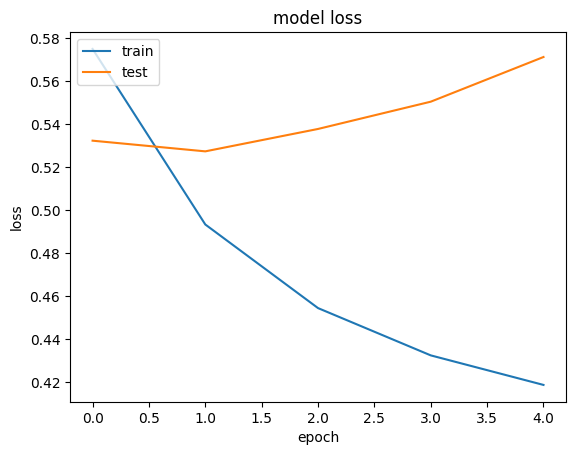

In [49]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

### **Tes Sistem Rekomendasi**

 Dataset anime dibaca dari file CSV ke dalam dataframe df, lalu mengganti semua nilai `Unknown` dengan `NaN` agar mempermudah proses pembersihan data

In [51]:
df = pd.read_csv(DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

 Memilih user secara acak dari dataset rating untuk dilakukan pengujian rekomendasi.

In [ ]:
import random

# Pilih user secara acak
random_user = random.choice(rating["user_id"].unique())
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

# Daftar anime yang telah ditonton oleh user
animes_watched_by_user = rating[rating["user_id"] == random_user]
anime_not_watched = df[ # Use 'df' instead of 'anime'
    ~df["anime_id"].isin(animes_watched_by_user["anime_id"].values)
]

# Filter anime yang belum ditonton dan ada dalam daftar encoding
anime_not_watched = anime_not_watched[anime_not_watched["anime_id"].isin(anime2anime_encoded.keys())]
anime_not_watched_encoded = [[anime2anime_encoded.get(x)] for x in anime_not_watched["anime_id"]]

# Encode user
user_encoder = user2user_encoded.get(random_user)

# Membuat array untuk prediksi
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched_encoded), anime_not_watched_encoded)
)

# Prediksi rating
user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
predicted_ratings = model.predict(user_anime_array).flatten()

# Pilih 10 rekomendasi tertinggi
top_ratings_indices = (-predicted_ratings).argsort()[:10]
recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched_encoded[x][0]) for x in top_ratings_indices
]

# Tampilkan hasil rekomendasi
print("---" * 25)
print("> Top 10 anime recommendations")
print("---" * 25)
for anime_id in recommended_anime_ids:
    anime_data = df[df["anime_id"] == anime_id] # Use 'df' instead of 'anime'
    name = anime_data["eng_version"].values[0] # Access 'Name' column for anime name
    genre = anime_data["Genres"].values[0] if not pd.isna(anime_data["Genres"].values[0]) else "Unknown" # Access 'Genres' for genre
    print(f"Name: {name}, Genre: {genre}")

Showing recommendations for user: 5202
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
---------------------------------------------------------------------------
> Top 10 anime recommendations
---------------------------------------------------------------------------
Name: Captain Fatz and the Seamorphs, Genre: Action, Adventure, Fantasy, Magic
Name: Starlight Scramble Renai Kouhosei, Genre: Action, Romance, Sci-Fi
Name: Ultraman Kids no Kotowaza Monogatari, Genre: Comedy, Kids, Super Power
Name: Full Metal Panic!, Genre: Action, Military, Sci-Fi, Comedy, Mecha
Name: Kinnikuman: Ooabare! Seigi Choujin, Genre: Action, Comedy, Sports, Shounen
Name: Golden Boy, Genre: Adventure, Comedy, Ecchi
Name: Dai-chan, Daisuki., Genre: Drama, School, Slice of Life
Name: Darker than Black, Genre: Action, Sci-Fi, Mystery, Super Power
Name: Esper Mami Special: My Angel Mami-chan, Genre: Comedy, Super Power, Supernatural
Name: Samurai X:Trust and Betrayal, Genre: Action, Historical, Drama, Romance, Martial A